In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
## there is not any null/missing values.

In [8]:
df.duplicated().sum()

0

In [9]:
## there is not any repeated value

In [10]:
df.nunique(),df.dtypes

(gender                          2
 race_ethnicity                  5
 parental_level_of_education     6
 lunch                           2
 test_preparation_course         2
 math_score                     81
 reading_score                  72
 writing_score                  77
 dtype: int64,
 gender                         object
 race_ethnicity                 object
 parental_level_of_education    object
 lunch                          object
 test_preparation_course        object
 math_score                      int64
 reading_score                   int64
 writing_score                   int64
 dtype: object)

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
### Insights 

#1.mean of all three numerical columns are very close to each other
#2.std lies between 14.5 and 15.20
#3.25% and 75% are also close to each other.  
# --> these means all these three columns are very well scaled.

In [13]:
for i in range(len(df.columns)):
    print(i+1,df.columns[i],df[df.columns[i]].unique(),sep=" --> ")

1 --> gender --> ['female' 'male']
2 --> race_ethnicity --> ['group B' 'group C' 'group A' 'group D' 'group E']
3 --> parental_level_of_education --> ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
4 --> lunch --> ['standard' 'free/reduced']
5 --> test_preparation_course --> ['none' 'completed']
6 --> math_score --> [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
7 --> reading_score --> [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  9

In [14]:
## the last three features have a lot of unique values which forces us to not think a lot of about them

In [15]:
num_features=[df.columns[i] for i in range(len(df.columns)) if df[df.columns[i]].dtype!='O']
cat_features=[df.columns[i] for i in range(len(df.columns)) if df[df.columns[i]].dtype=='O']

In [16]:
## Separating numerical and categorical features

In [17]:
num_features,cat_features

(['math_score', 'reading_score', 'writing_score'],
 ['gender',
  'race_ethnicity',
  'parental_level_of_education',
  'lunch',
  'test_preparation_course'])

In [18]:
val=0;
for i in range(len(df.columns)):
    if('score' in df.columns[i]):
        val=val+df[df.columns[i]]
df['total_score']=val  
df['average']=df['total_score']/3

In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
math_100=df[df["math_score"]==100]["average"].count()
reading_100=df[df["reading_score"]==100]["average"].count()
writing_100=df[df["writing_score"]==100]["average"].count()

In [21]:
math_20=df[df["math_score"]<=20]["average"].count()
reading_20=df[df["reading_score"]<=20]["average"].count()
writing_20=df[df["writing_score"]<=20]["average"].count()

In [22]:
math_100,math_20,reading_100,reading_20,writing_100,writing_20

(7, 4, 17, 1, 14, 3)

In [23]:
## from above we can conclude that math test may be tough because less no. in 100s and high in 20s. as compared to others.

## Visualisation

<Axes: xlabel='average', ylabel='Count'>

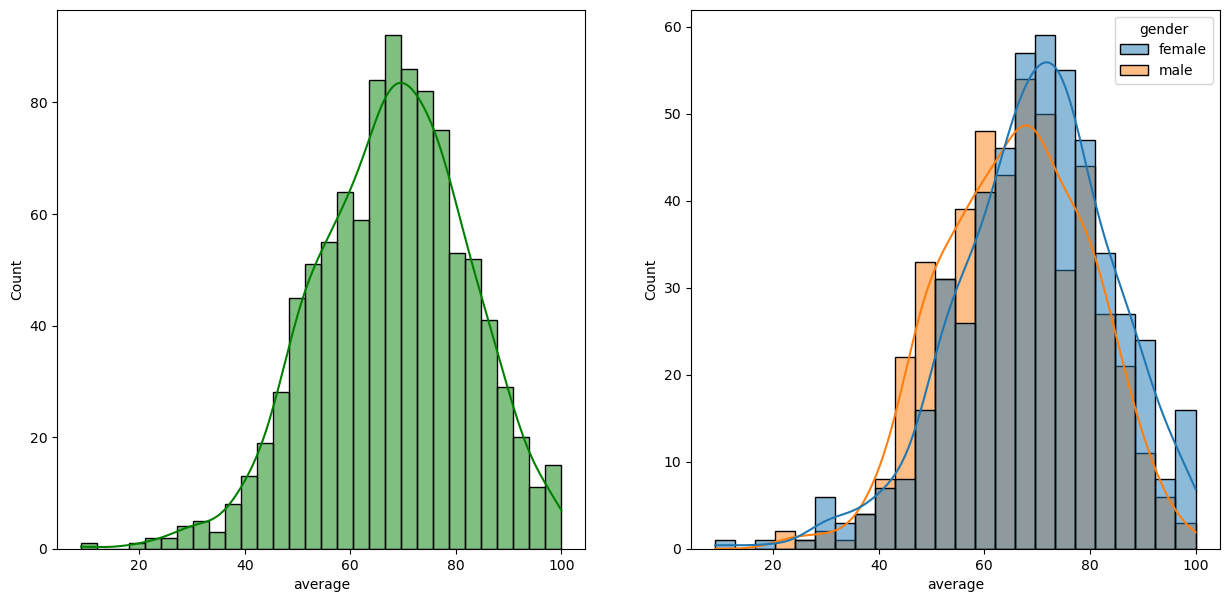

In [25]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(df,x='average',kde=True,hue="gender")

In [26]:
## female are performing well then male in the test

<Axes: xlabel='average', ylabel='Count'>

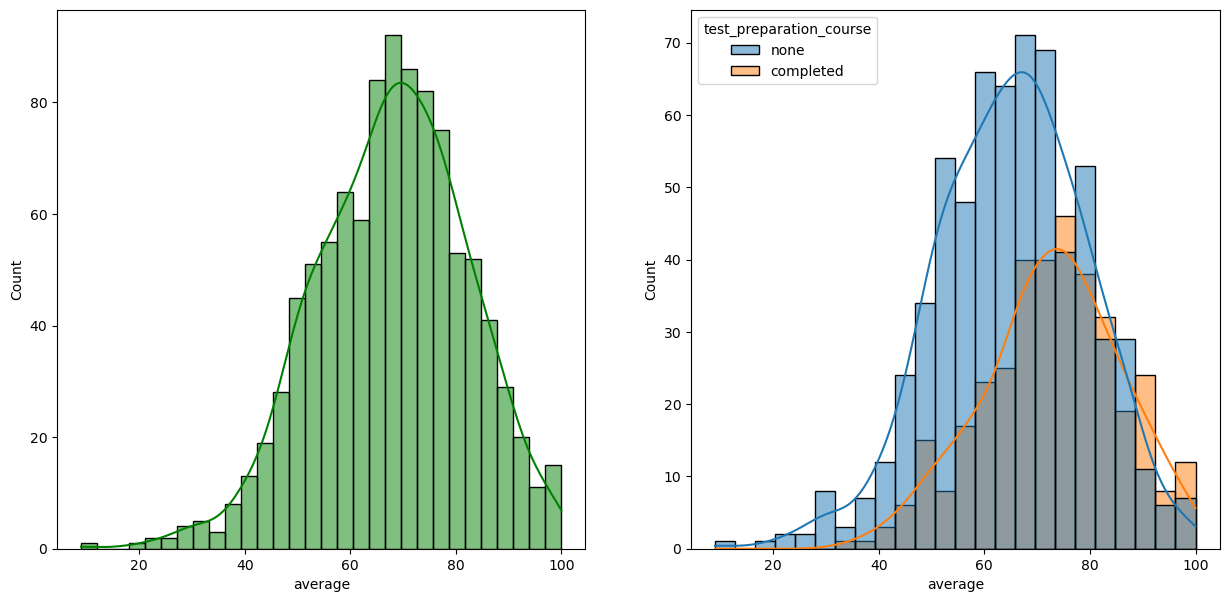

In [27]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(df,x='average',kde=True,hue="test_preparation_course")

In [28]:
## those have taken course are able to solve test perfectly to gain higher score whereas in mid without course taken 
## students perform .

<Axes: xlabel='average', ylabel='Count'>

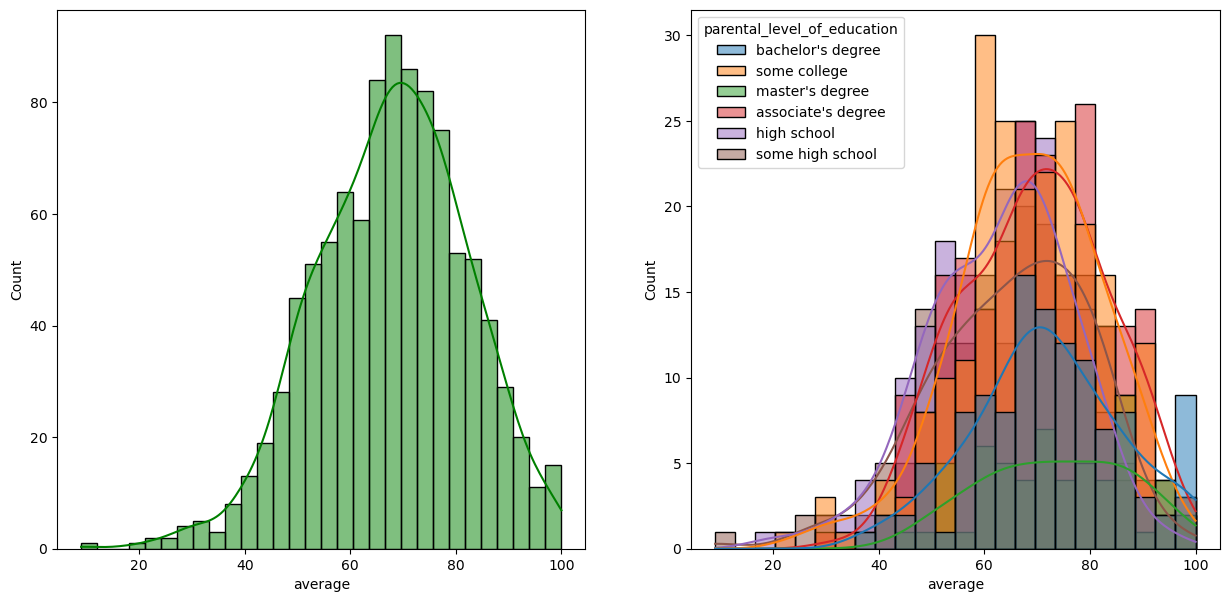

In [29]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(df,x='average',kde=True,hue="parental_level_of_education")

In [30]:
## those who have done master and bachelor performs good

In [31]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

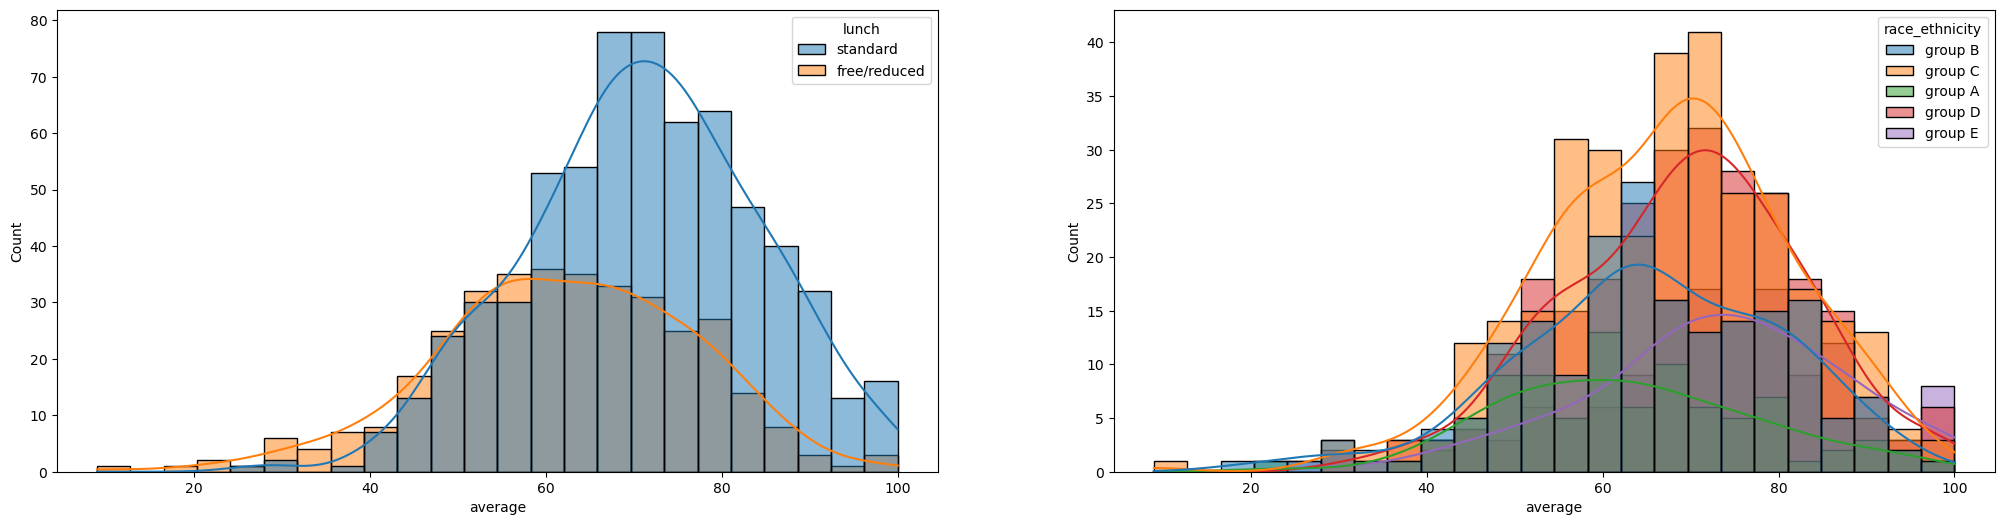

In [32]:
fig,axes=plt.subplots(1,2,figsize=(25,6))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.show()

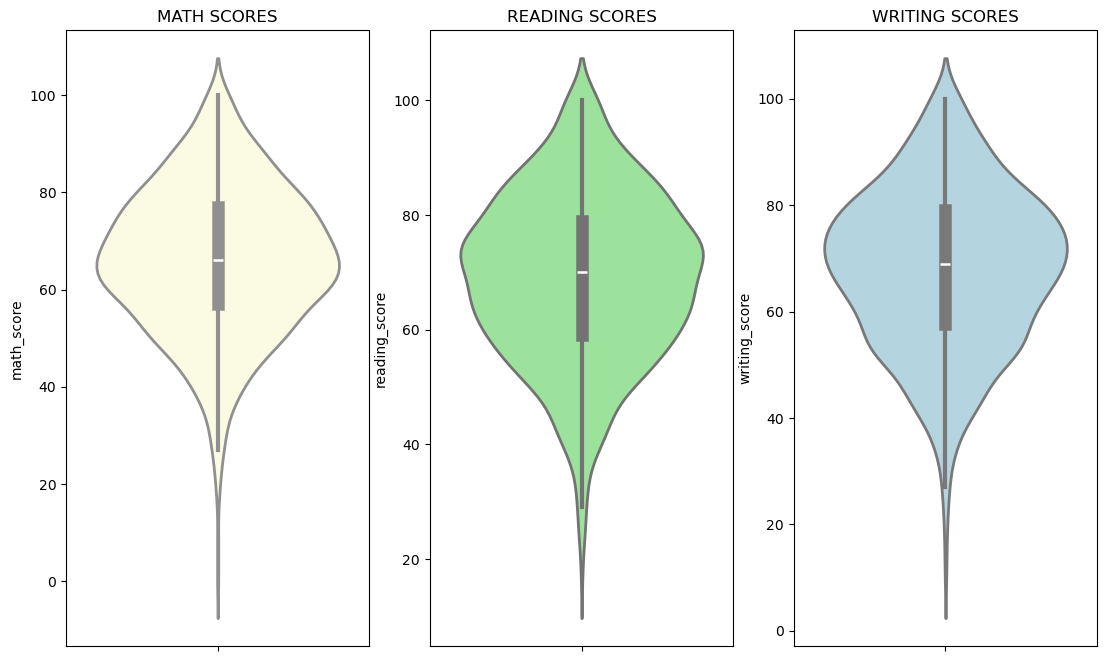

In [33]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='lightyellow',linewidth=2)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='lightgreen',linewidth=2)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='lightblue',linewidth=2)
plt.show()

## Multivariate Analysis

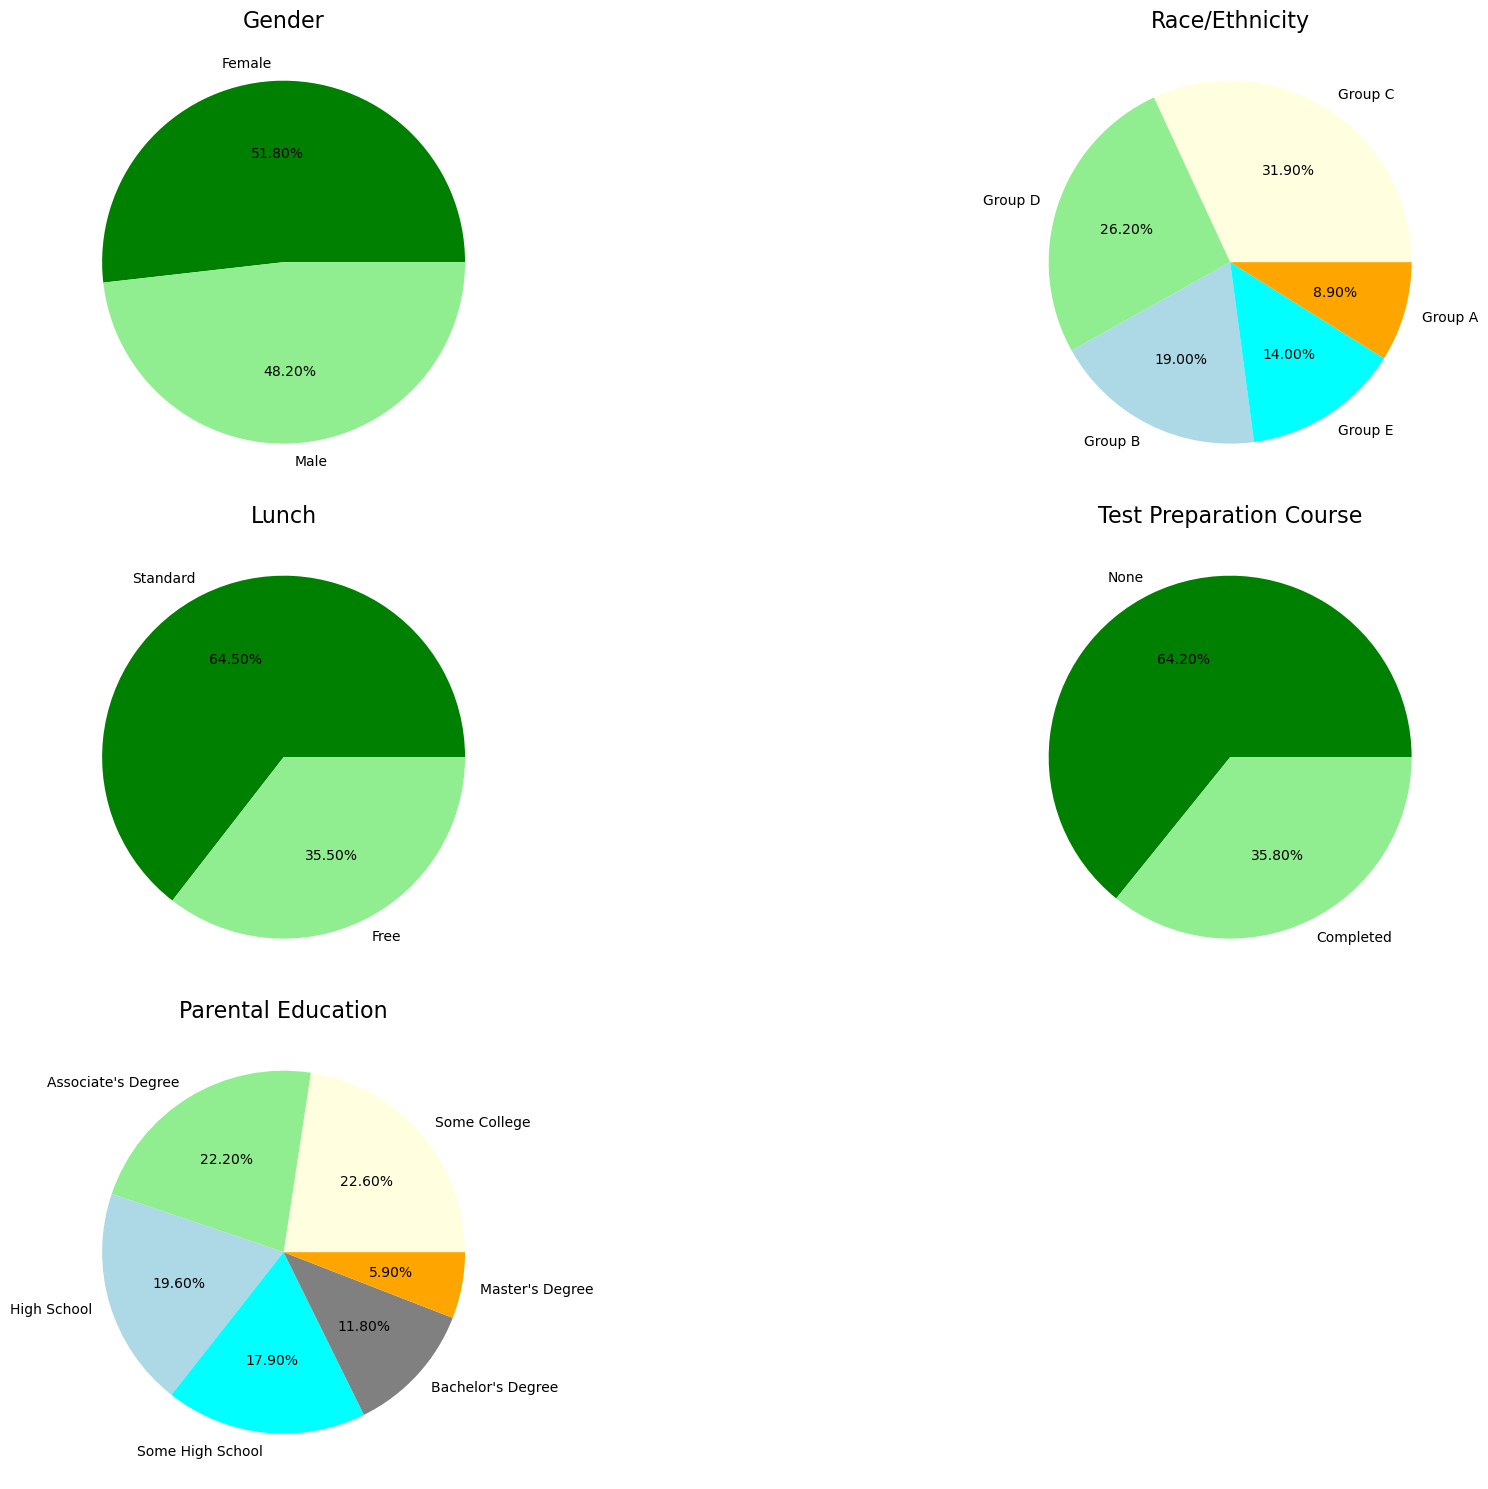

In [35]:


plt.rcParams['figure.figsize'] = (20, 15)

plt.subplot(3, 2, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['green', 'lightgreen']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Gender', fontsize=16)
plt.axis('off')

plt.subplot(3, 2, 2)
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors = ['lightyellow', 'lightgreen', 'lightblue', 'cyan', 'orange']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Race/Ethnicity', fontsize=16)
plt.axis('off')

plt.subplot(3, 2, 3)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free']
colors = ['green', 'lightgreen']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Lunch', fontsize=16)
plt.axis('off')

plt.subplot(3, 2, 4)
size = df['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
colors = ['green', 'lightgreen']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Test Preparation Course', fontsize=16)
plt.axis('off')

plt.subplot(3, 2, 5)
size = df['parental_level_of_education'].value_counts()
labels = ['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]
colors = ['lightyellow', 'lightgreen', 'lightblue', 'cyan', 'grey', 'orange']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Parental Education', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()

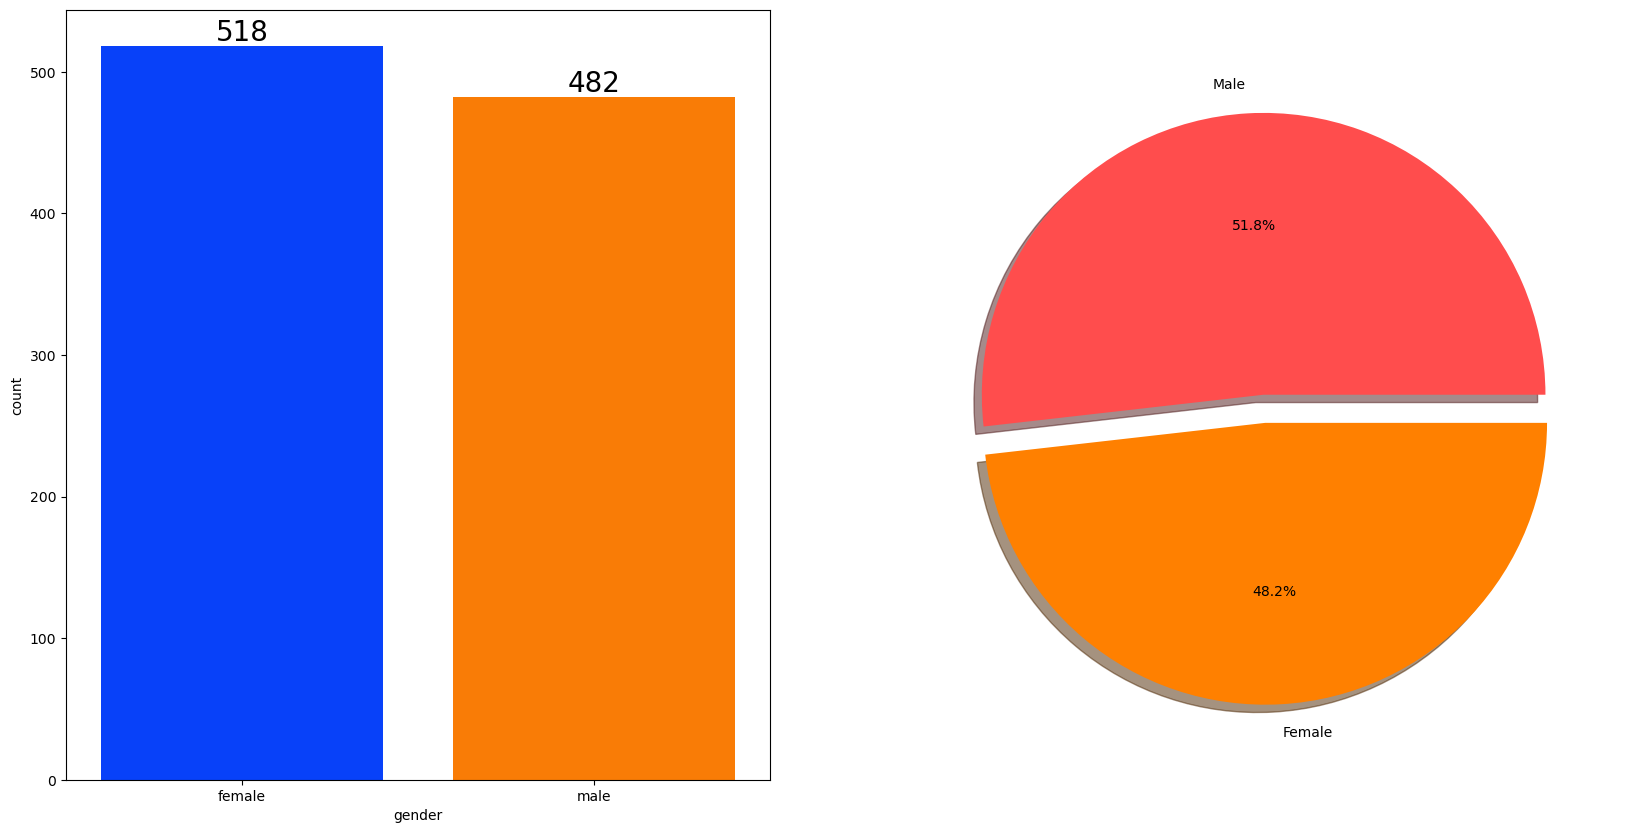

In [72]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [82]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


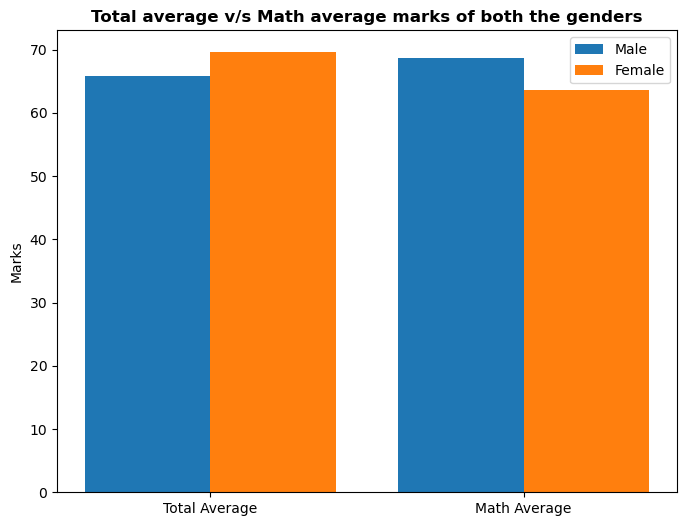

In [96]:

plt.figure(figsize=(8,6))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

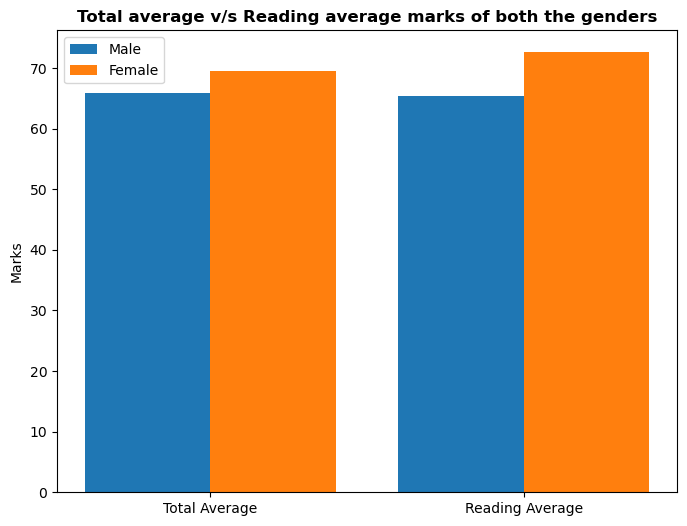

In [94]:

plt.figure(figsize=(8,6))

X = ['Total Average','Reading Average']


female_scores = [gender_group['average'][0], gender_group['reading_score'][0]]
male_scores = [gender_group['average'][1], gender_group['reading_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Reading average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

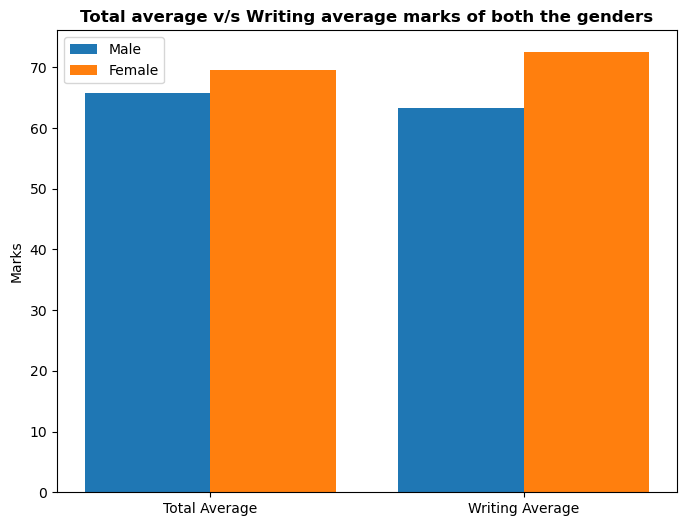

In [98]:

plt.figure(figsize=(8,6))

X = ['Total Average','Writing Average']


female_scores = [gender_group['average'][0], gender_group['writing_score'][0]]
male_scores = [gender_group['average'][1], gender_group['writing_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Writing average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

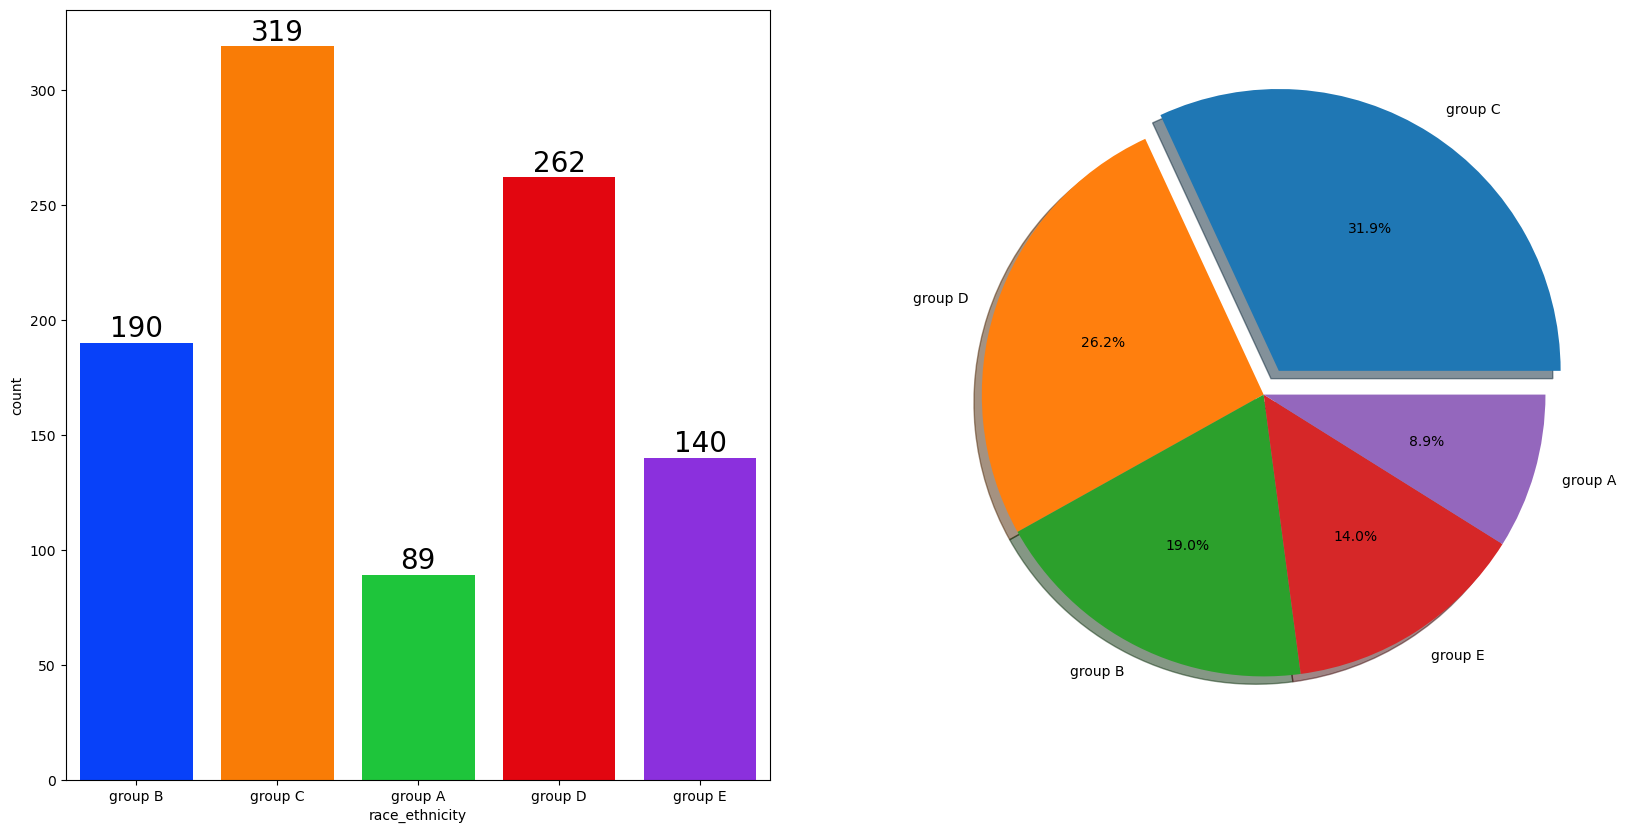

In [103]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

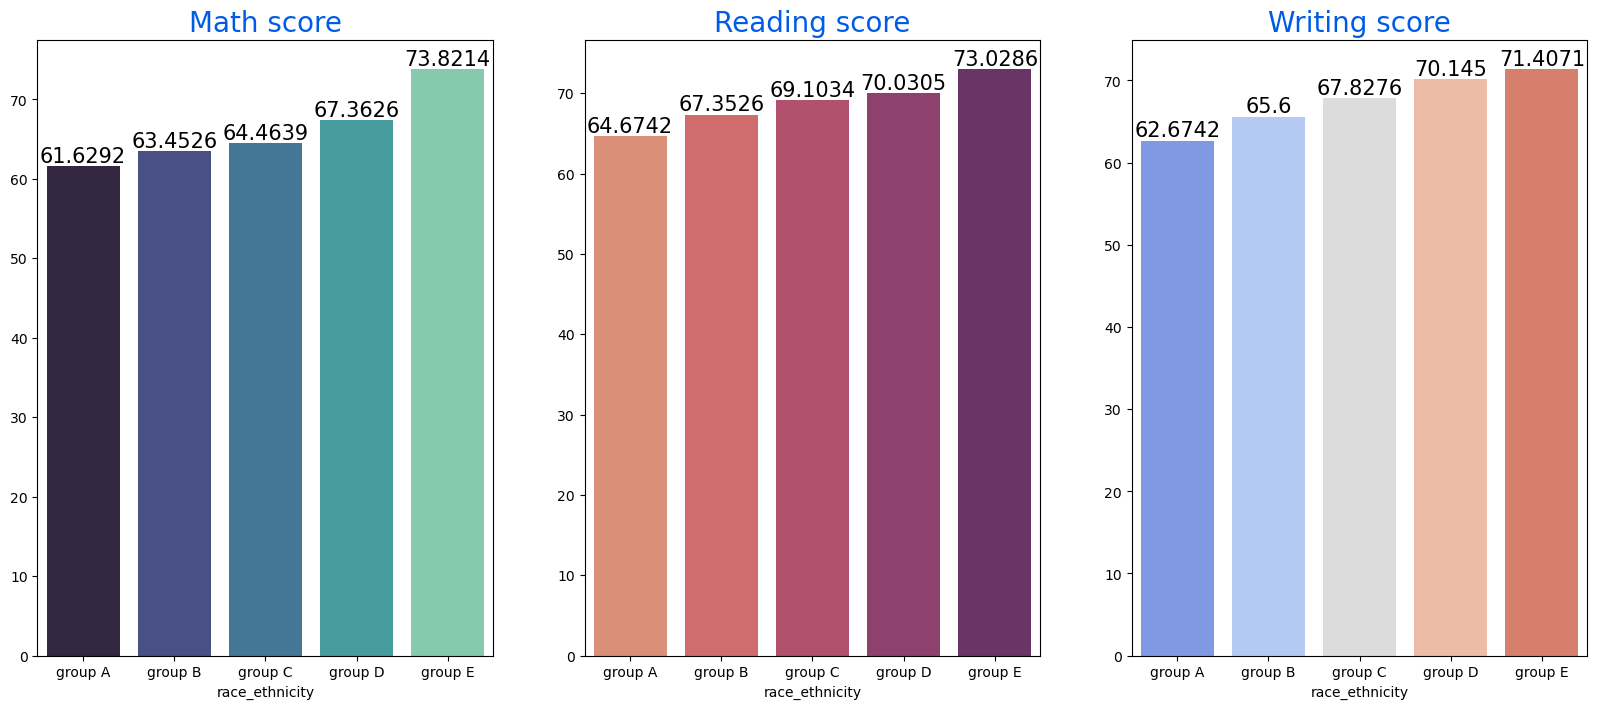

In [106]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

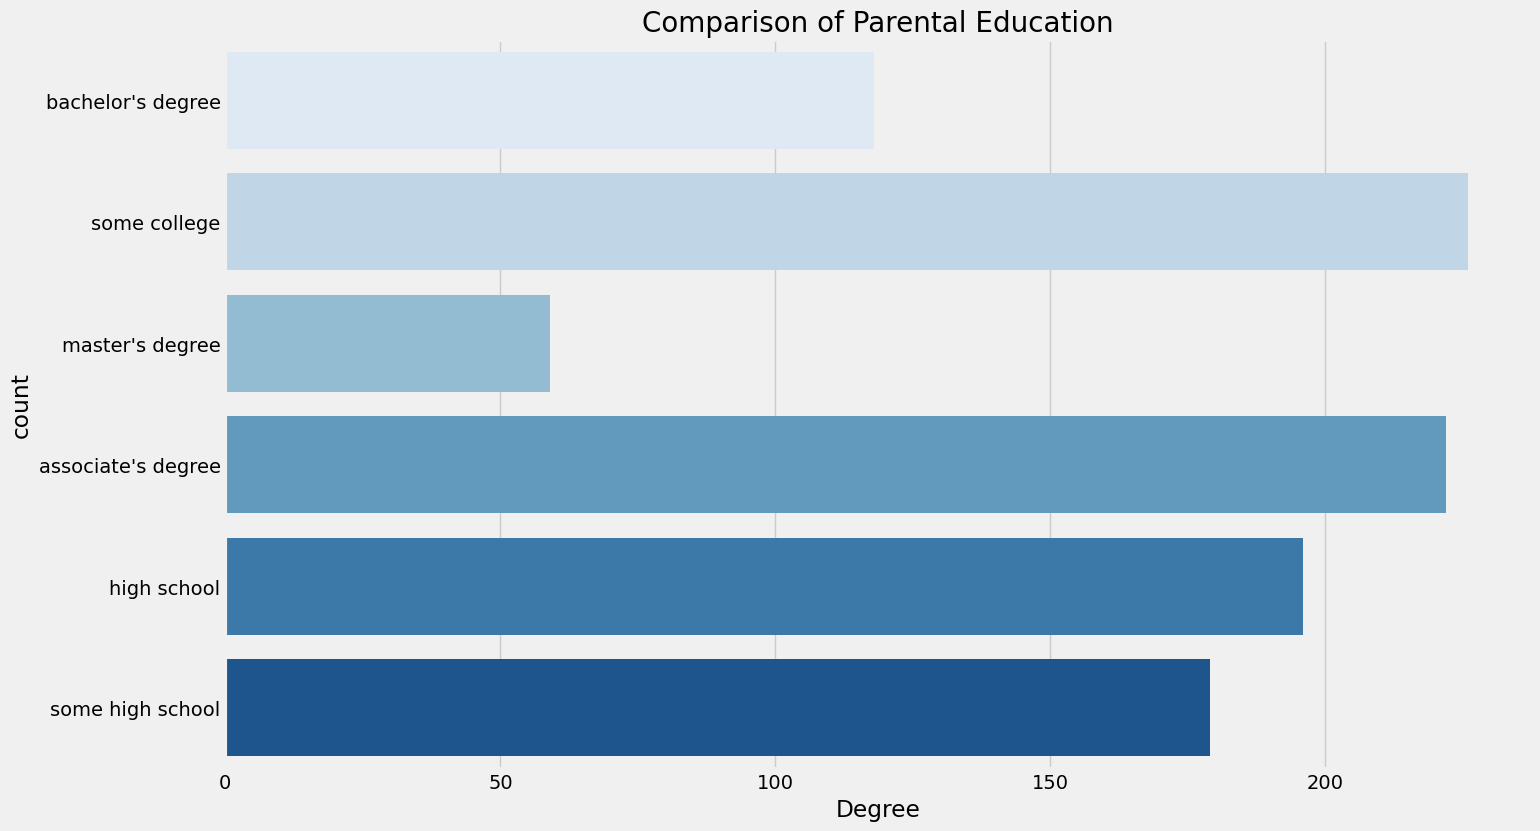

In [112]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [127]:
list(df.groupby('parental_level_of_education').agg('mean'))

['math_score', 'reading_score', 'writing_score', 'total_score', 'average']

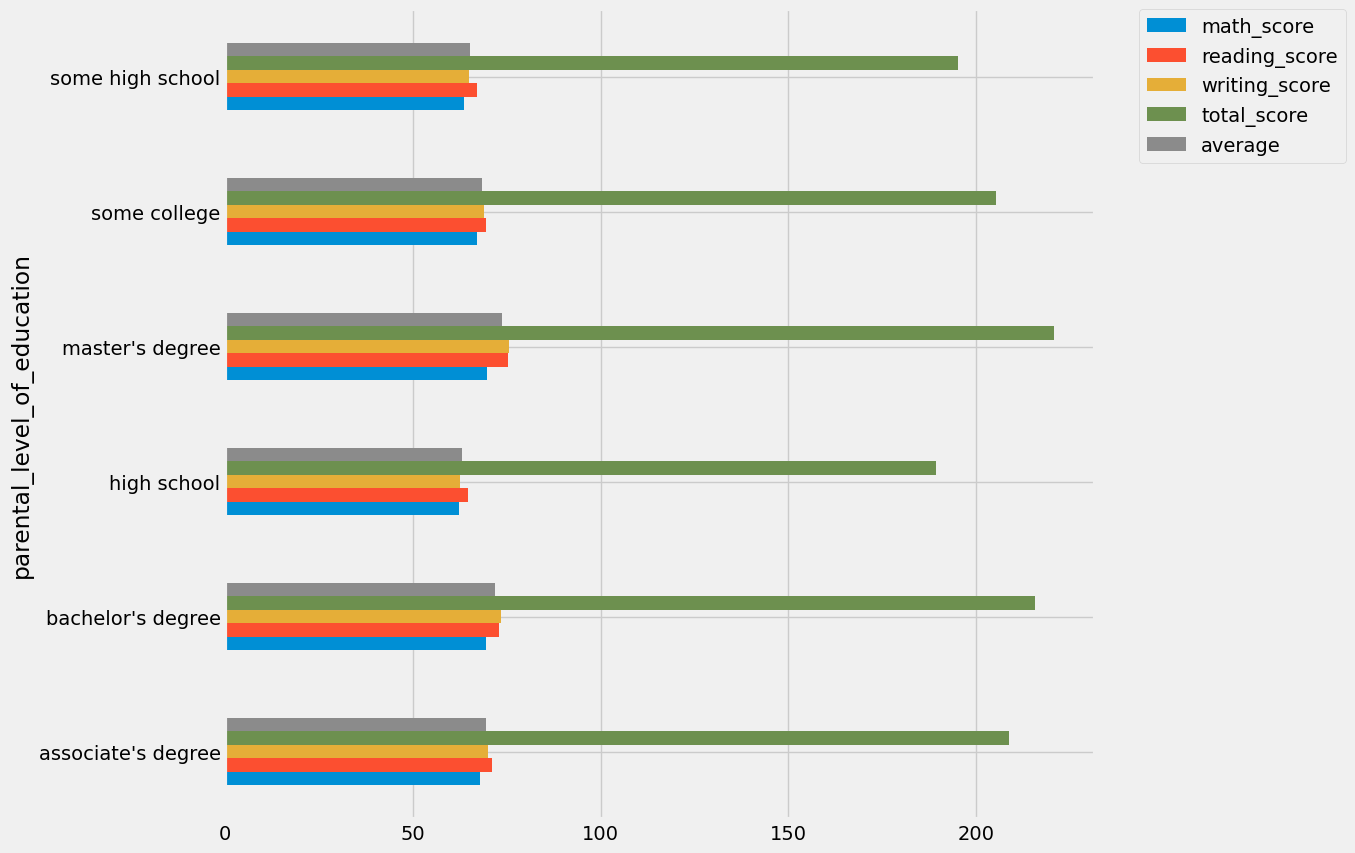

In [115]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

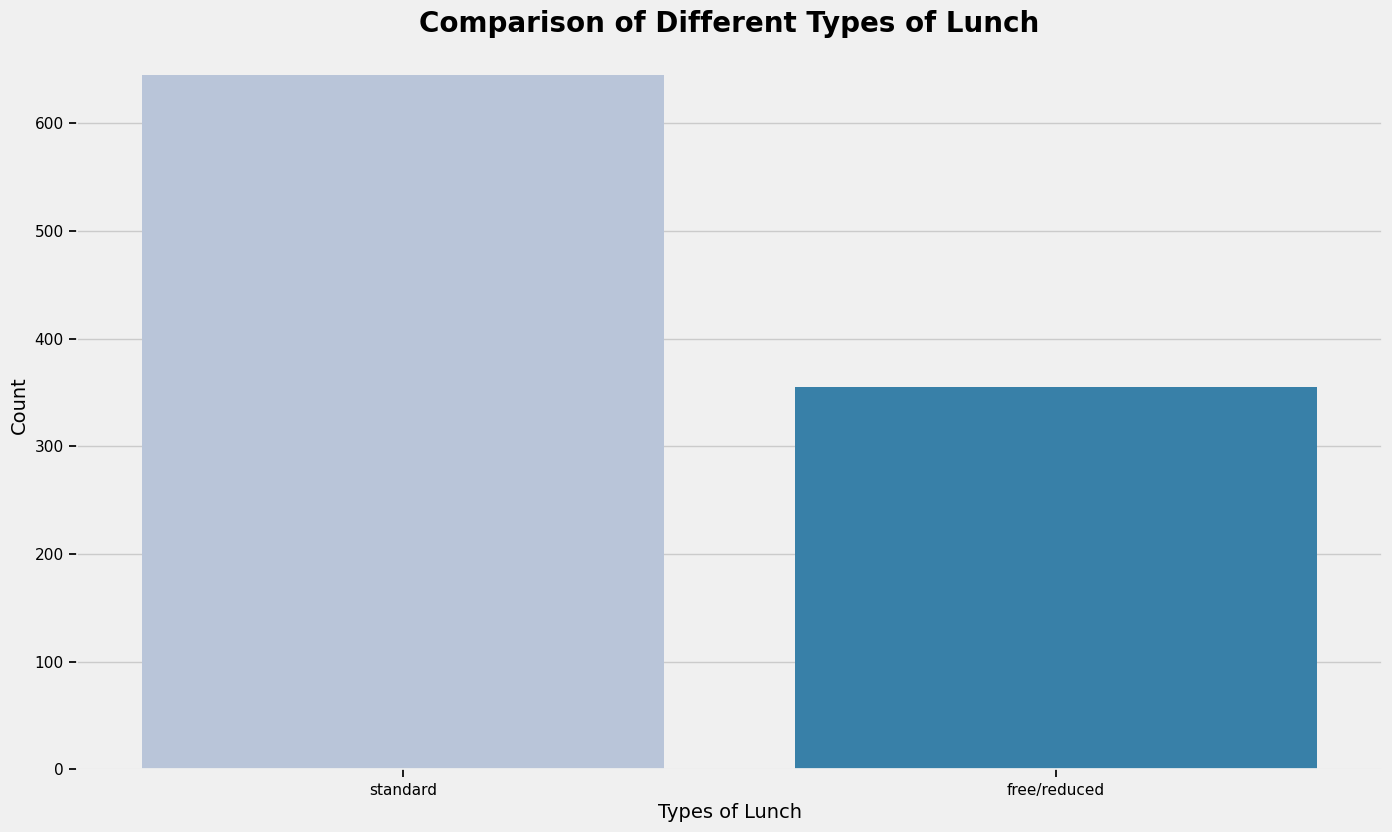

In [138]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(data=df, x='lunch', palette='PuBu')
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

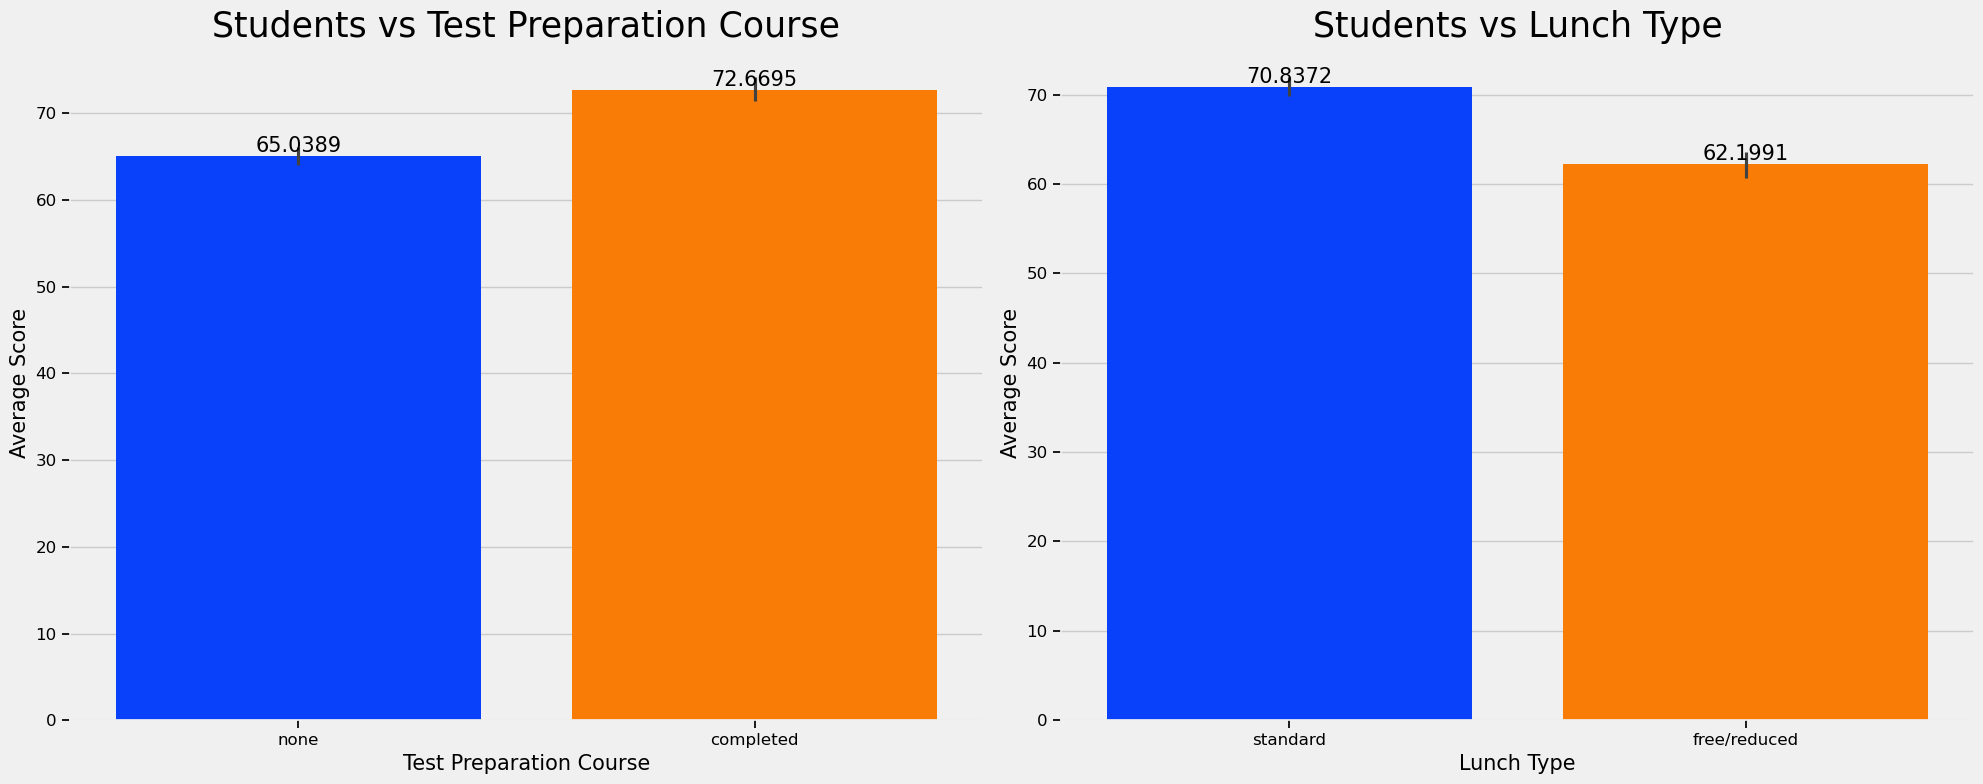

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Test preparation course vs. Average (Vertical Bars)
sns.barplot(y='average', x='test_preparation_course', data=df, palette='bright', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)
ax[0].set_xlabel('Test Preparation Course', size=15)
ax[0].set_ylabel('Average Score', size=15)
ax[0].tick_params(axis='both', which='major', labelsize=12)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)


# Plot 2: Lunch type vs. Average (Vertical Bars)
sns.barplot(y='average', x='lunch', data=df, palette='bright', saturation=0.95, ax=ax[1])
ax[1].set_title('Students vs Lunch Type', color='black', size=25)
ax[1].set_xlabel('Lunch Type', size=15)
ax[1].set_ylabel('Average Score', size=15)
ax[1].tick_params(axis='both', which='major', labelsize=12)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)


# Adjust layout for better appearance
plt.tight_layout()
plt.show()

<Axes: xlabel='lunch', ylabel='writing_score'>

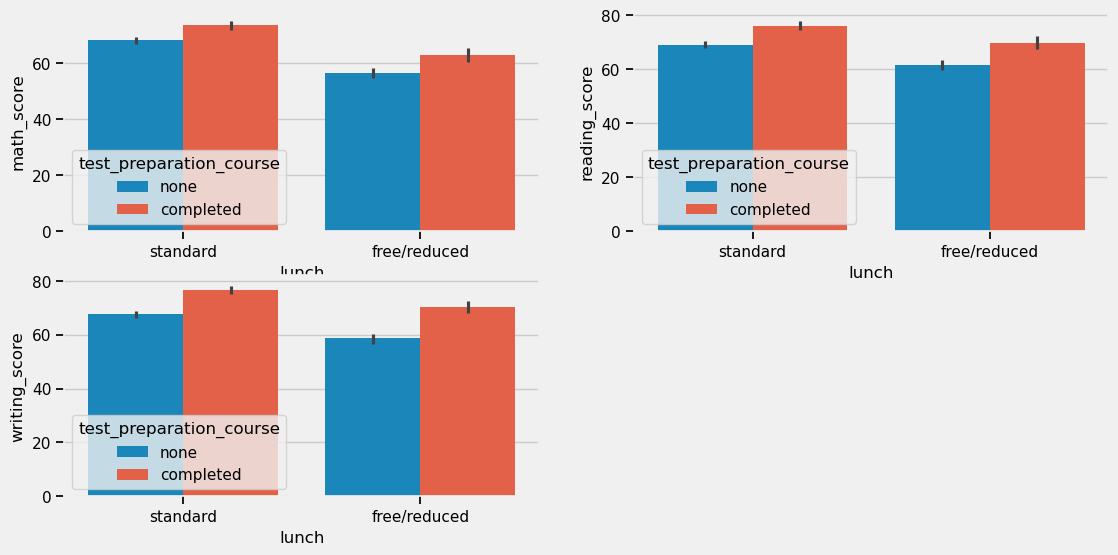

In [151]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

In [163]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


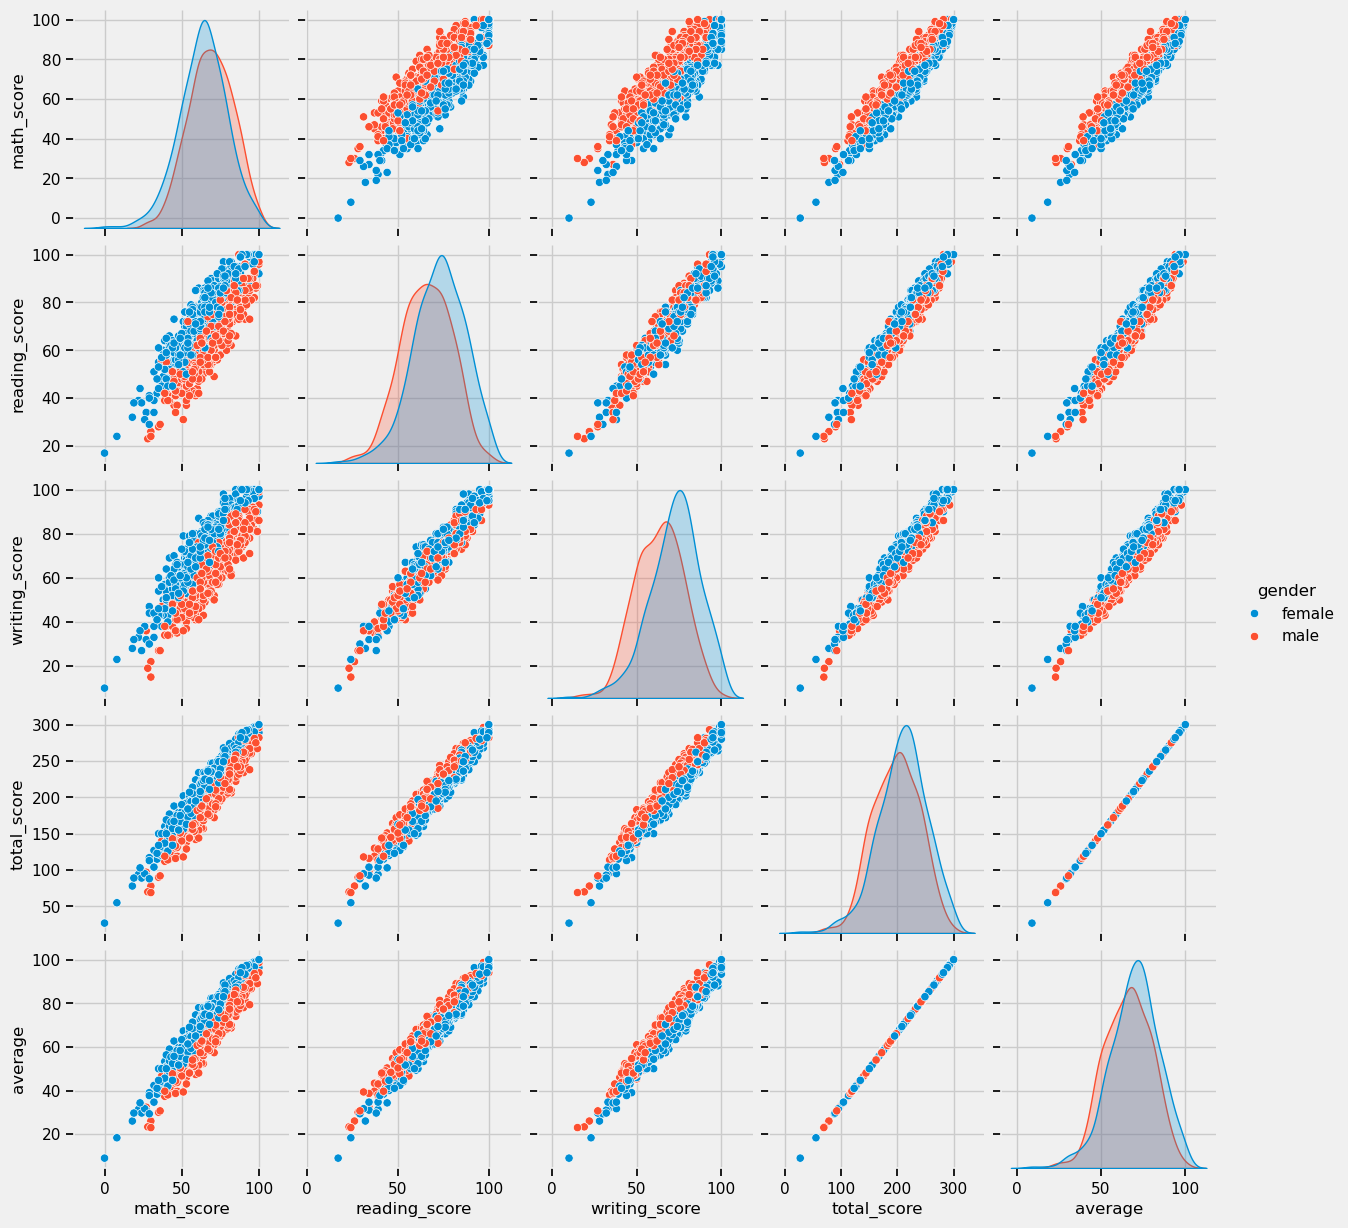

In [159]:
sns.pairplot(data=df,hue="gender")

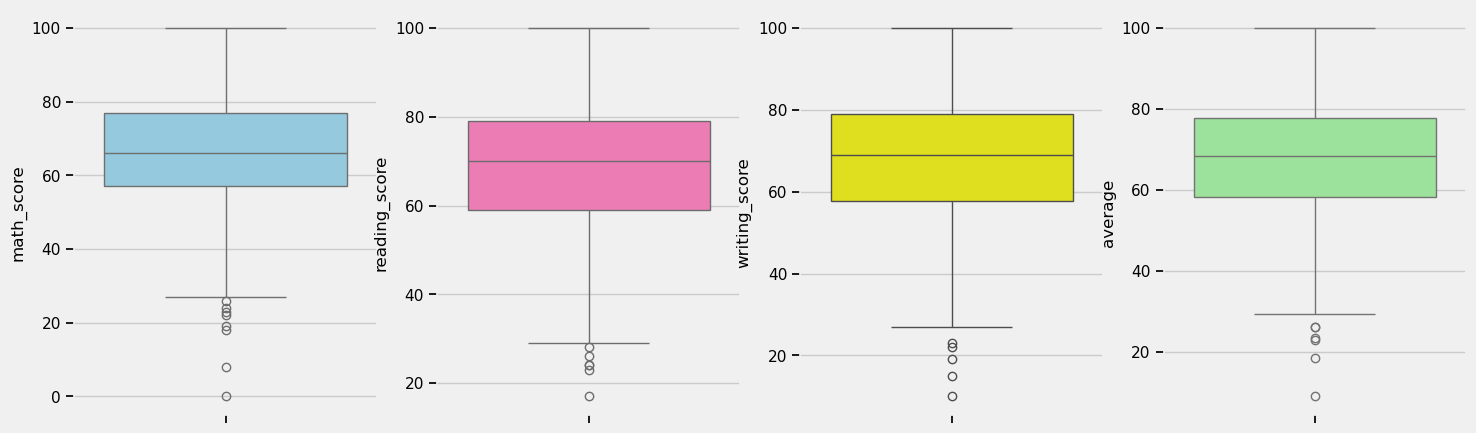

In [156]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

In [196]:
df.to_csv("new_Stud.csv")